In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('dataframe1000rows.csv')
data.head()

,Nom,Ãge,NA,Cor,Cen,Drb,Apl,Agr,Fin,Ctn,...,Ant,TÃªt,Tir,T Lg,Mar,Pas,Pen,Tcl,Tec,NA_end
0,Matthijs de Ligt,23,160,4,7,10,9,16,8,13,...,14,16,10,5,16,14,8,16,13,168
1,Kim Min-Jae,26,162,2,7,11,8,17,7,14,...,15,16,6,7,16,14,6,16,12,163
2,Alphonso Davies,22,156,10,11,17,13,15,9,10,...,11,9,9,14,9,12,11,14,13,165
3,Dayot Upamecano,24,156,3,7,12,10,16,7,13,...,13,14,6,10,15,16,7,17,13,159
4,Niklas SÃ¼le,27,154,3,12,12,11,11,8,14,...,14,15,12,11,15,14,8,15,13,154


# Pre-Processing

In [34]:
df = data.copy()
df.columns

Index(['Nom', 'Ãge', 'NA', 'Cor', 'Cen', 'Drb', 'Apl', 'Agr', 'Fin', 'Ctn',
       'Ctr', 'DÃ©t', 'Ins', 'Col', 'DÃ©c', 'Ãqu', 'CF', 'Acc', 'Pui', 'Pla',
       'Phy', 'Vol', 'Vit', 'Agi', 'DÃ©t.1', 'Sgf', 'End', 'Crg', 'Ldr', 'Vis',
       'Ant', 'TÃªt', 'Tir', 'T Lg', 'Mar', 'Pas', 'Pen', 'Tcl', 'Tec',
       'NA_end'],
      dtype='object')

In [35]:
df.rename(columns={'T Lg':'T_Lg','Ãge':'Age','DÃ©t':'Det', 'DÃ©c':'Dec', 'DÃ©t.1': 'Jump','TÃªt':'Head', 'Ãqu': 'Equ'}, inplace=True)
def progress(score):
    if score<=0.99:
        x=1
    elif score>=1.01:
        x=0
    else:
        x=2
    return x

df = df[df['NA']>=85]

df['progression'] = df['NA_end']/df['NA']
df = df.drop('Nom', axis=1)
df['progress'] = df['progression'].apply(progress)
df.shape

(5257, 41)


### 0 Means Progress
### 1 Means Regress
### 2 Means same_level

In [36]:
#df = df[df['Age']>=18] lower the results

# TrainTest - Nettoyage - Encodage

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

In [39]:
trainset['progress'].value_counts(normalize=True)

progress
2    0.597384
0    0.246373
1    0.156243
Name: proportion, dtype: float64

In [40]:
testset['progress'].value_counts(normalize=True)

progress
2    0.566540
0    0.248099
1    0.185361
Name: proportion, dtype: float64

In [41]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Age            0.0
Agi            0.0
Jump           0.0
Sgf            0.0
End            0.0
Crg            0.0
Ldr            0.0
Vis            0.0
Ant            0.0
Head           0.0
Tir            0.0
T_Lg           0.0
Mar            0.0
Pas            0.0
Pen            0.0
Tcl            0.0
Tec            0.0
NA_end         0.0
Vit            0.0
progression    0.0
Vol            0.0
Pla            0.0
NA             0.0
Cor            0.0
Cen            0.0
Drb            0.0
Apl            0.0
Agr            0.0
Fin            0.0
Ctn            0.0
Ctr            0.0
Det            0.0
Ins            0.0
Col            0.0
Dec            0.0
Equ            0.0
CF             0.0
Acc            0.0
Pui            0.0
Phy            0.0
progress       0.0
dtype: float64

#### No need to deal with NaN values

In [42]:
def preprocessing(df):

    X = df.drop(['progress','progression','NA', 'NA_end'], axis = 1)
    y = df['progress']

    print(y.value_counts())
    return X, y

'NA_start' and 'NA_end are hidden values that the player can't normally see so I remove them because he won't be able to provide them in input.

In [43]:
X_train, y_train = preprocessing(trainset)

progress
2    2512
0    1036
1     657
Name: count, dtype: int64


In [44]:
X_test, y_test = preprocessing(testset)

progress
2    596
0    261
1    195
Name: count, dtype: int64


# Modelisation

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures

In [46]:
from sklearn import svm
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
from imblearn.over_sampling import SMOTE 

HELP: https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

In [48]:
model_1 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', DecisionTreeClassifier(random_state=42)]])

In [49]:
model_1 = DecisionTreeClassifier(random_state=42)

In [50]:
model_22 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', RandomForestClassifier(random_state=42)]])

In [51]:
model_2 = RandomForestClassifier(random_state=42)

In [52]:
model_3 = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['select', SelectKBest(f_classif, k = 8)],
                                ['classifier', RandomForestClassifier(random_state=42)]])

In [53]:
model_33 = make_pipeline(SelectKBest(f_classif, k = 8), RandomForestClassifier(random_state=42))

In [54]:
model_4 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                               ['poly', PolynomialFeatures(2)],
                                ['select', SelectKBest(f_classif, k = 8)],
                                ['classifier', RandomForestClassifier(random_state=42)]])

In [55]:
model_5 = svm.SVC(random_state=42)

In [56]:
model_6 = XGBClassifier(random_state=42)

In [57]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(MinMaxScaler(), svm.SVC(random_state=42)))]

model_7 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', StackingClassifier(estimators)]])

In [58]:
model_8 = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=3))

In [59]:
model_9 = AdaBoostClassifier(random_state=42)

# Evaluation

In [60]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

In [61]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))  
    print(f"F1 score: {f1_score(y_test, ypred, average='macro')}")

    #scorer = make_scorer(f1_score, average='macro')
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42),
                                              scoring='f1_macro',
                                              train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

    verif = y_test-ypred
    plt.figure(figsize=(18,5))
    plt.plot(np.arange(len(verif)), verif, marker='o', linestyle='-')

[[128   1 132]
 [  4 145  46]
 [131  36 429]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       261
           1       0.80      0.74      0.77       195
           2       0.71      0.72      0.71       596

    accuracy                           0.67      1052
   macro avg       0.66      0.65      0.66      1052
weighted avg       0.67      0.67      0.67      1052

F1 score: 0.656999115052455


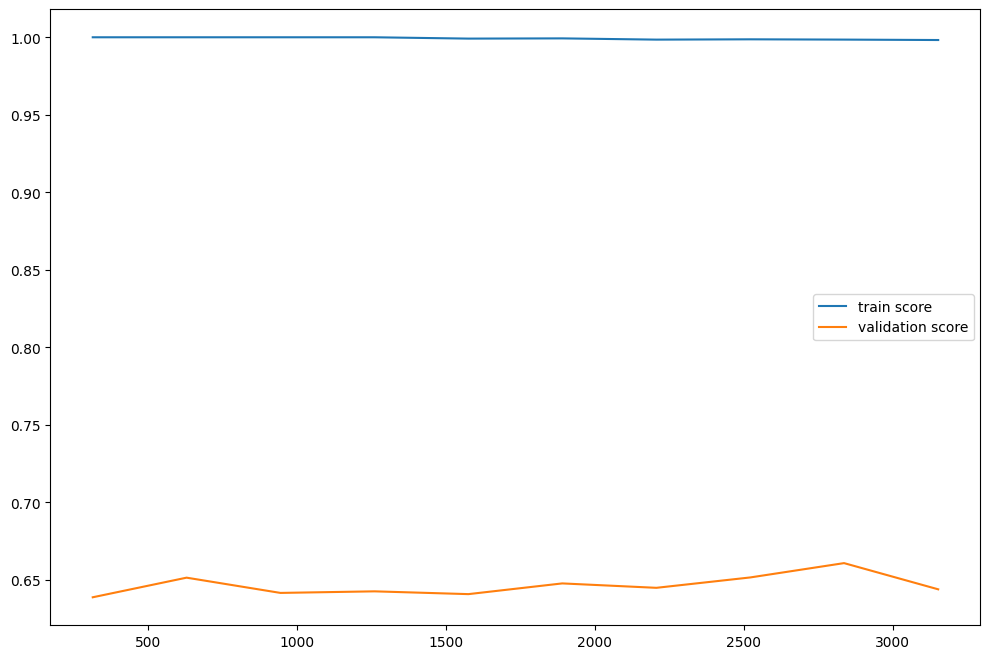

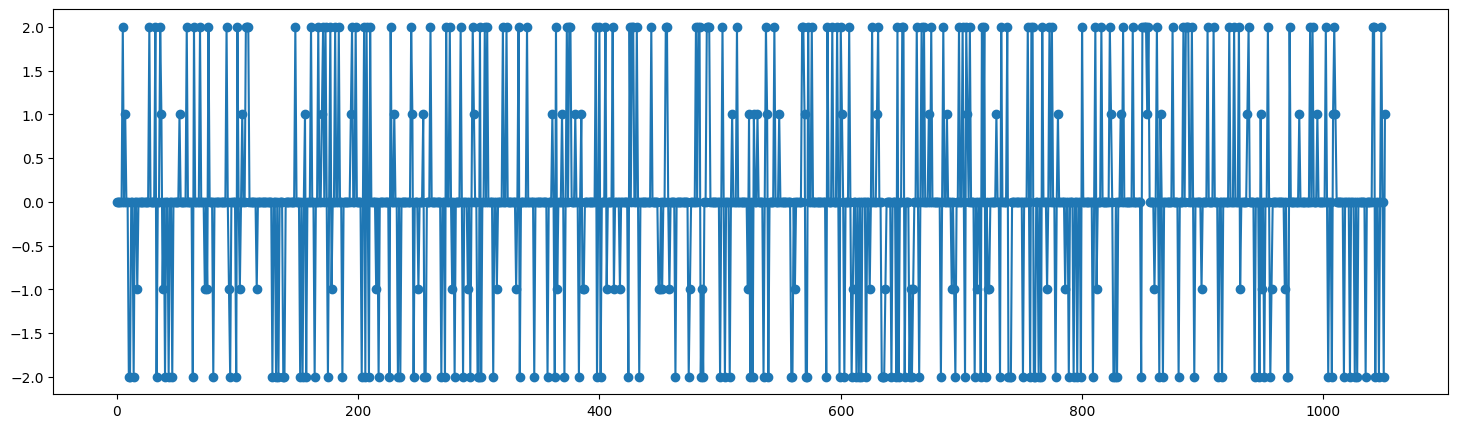

In [62]:
evaluation(model_1)

[[121   2 138]
 [  3 143  49]
 [ 64  14 518]]
              precision    recall  f1-score   support

           0       0.64      0.46      0.54       261
           1       0.90      0.73      0.81       195
           2       0.73      0.87      0.80       596

    accuracy                           0.74      1052
   macro avg       0.76      0.69      0.71      1052
weighted avg       0.74      0.74      0.73      1052

F1 score: 0.7143985453315401


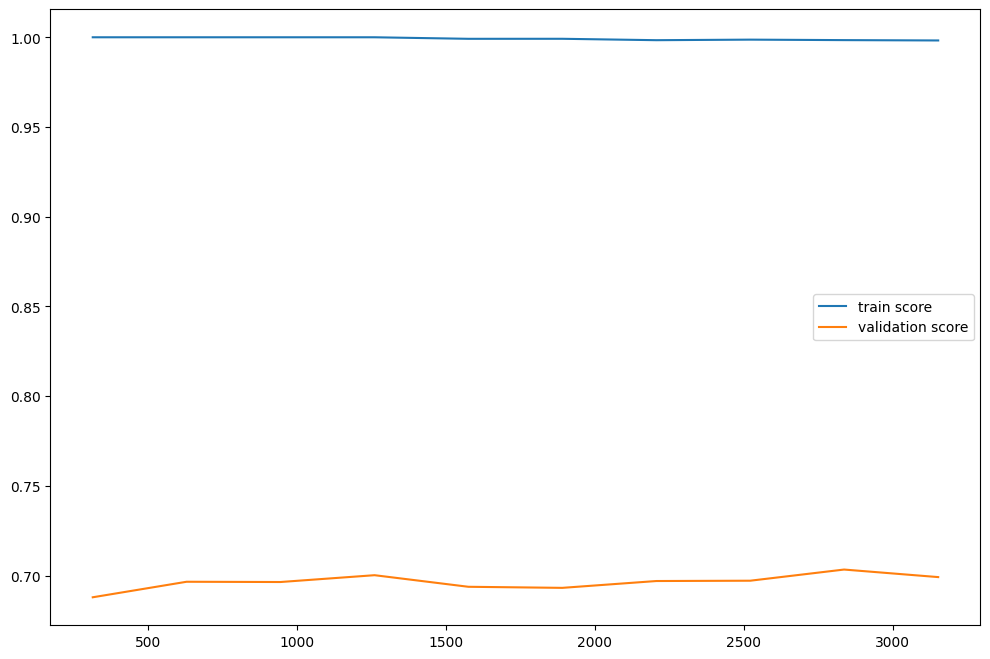

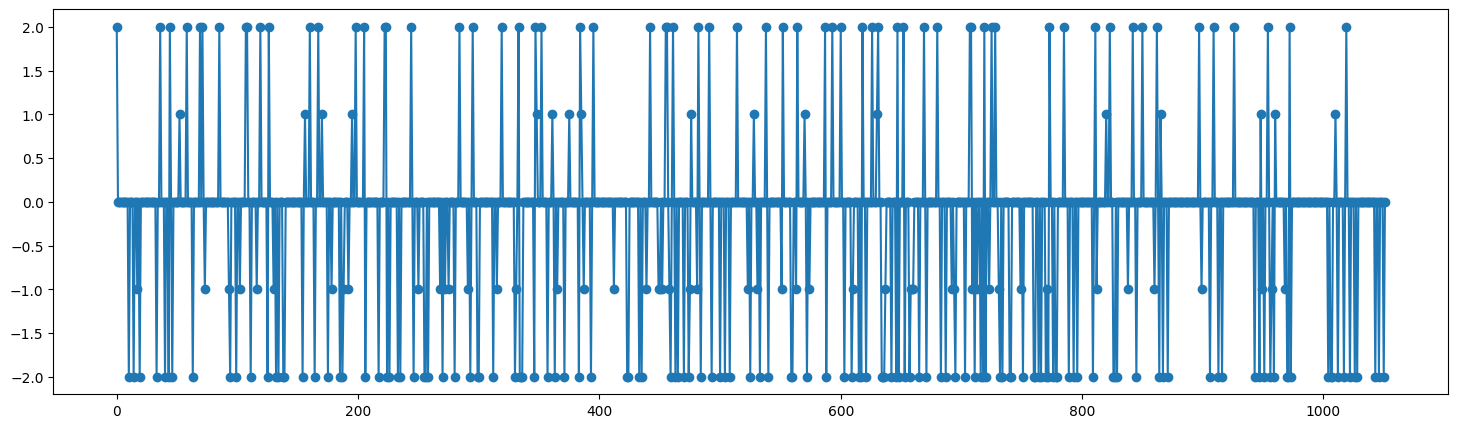

In [63]:
evaluation(model_2)

[[148   3 110]
 [  3 146  46]
 [107  33 456]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       261
           1       0.80      0.75      0.77       195
           2       0.75      0.77      0.75       596

    accuracy                           0.71      1052
   macro avg       0.71      0.69      0.70      1052
weighted avg       0.71      0.71      0.71      1052

F1 score: 0.6999434164740995


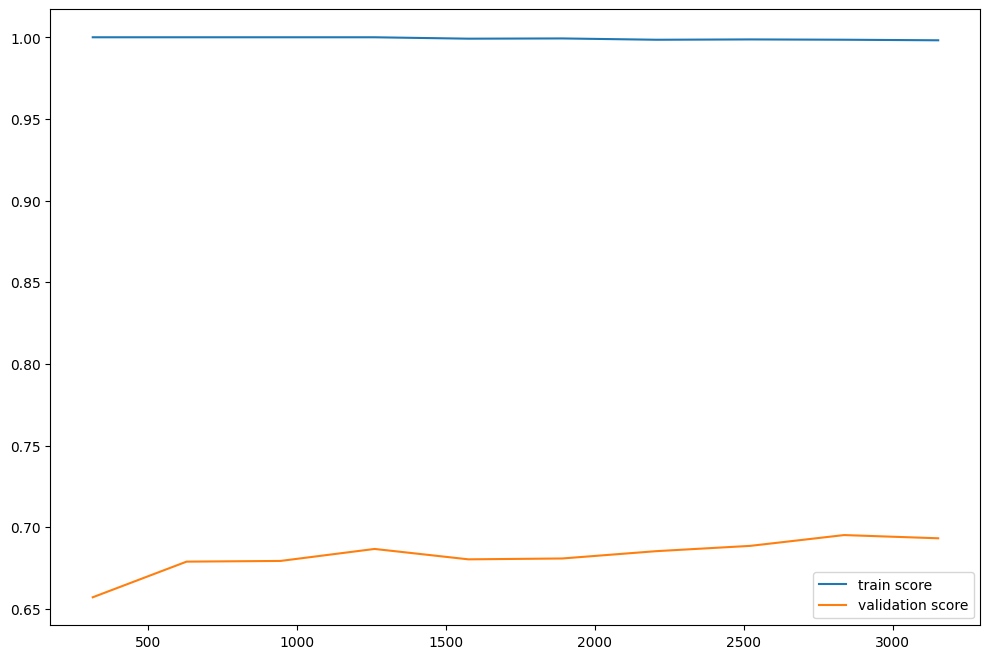

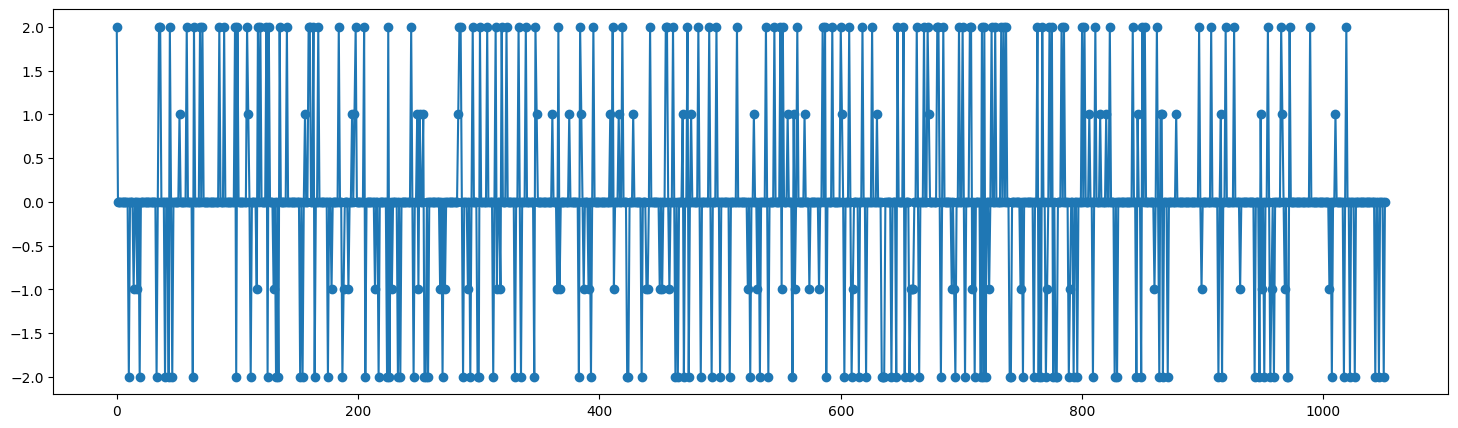

In [64]:
evaluation(model_22)

[[153   7 101]
 [  6 160  29]
 [115  48 433]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       261
           1       0.74      0.82      0.78       195
           2       0.77      0.73      0.75       596

    accuracy                           0.71      1052
   macro avg       0.69      0.71      0.70      1052
weighted avg       0.71      0.71      0.71      1052

F1 score: 0.6998820933997282


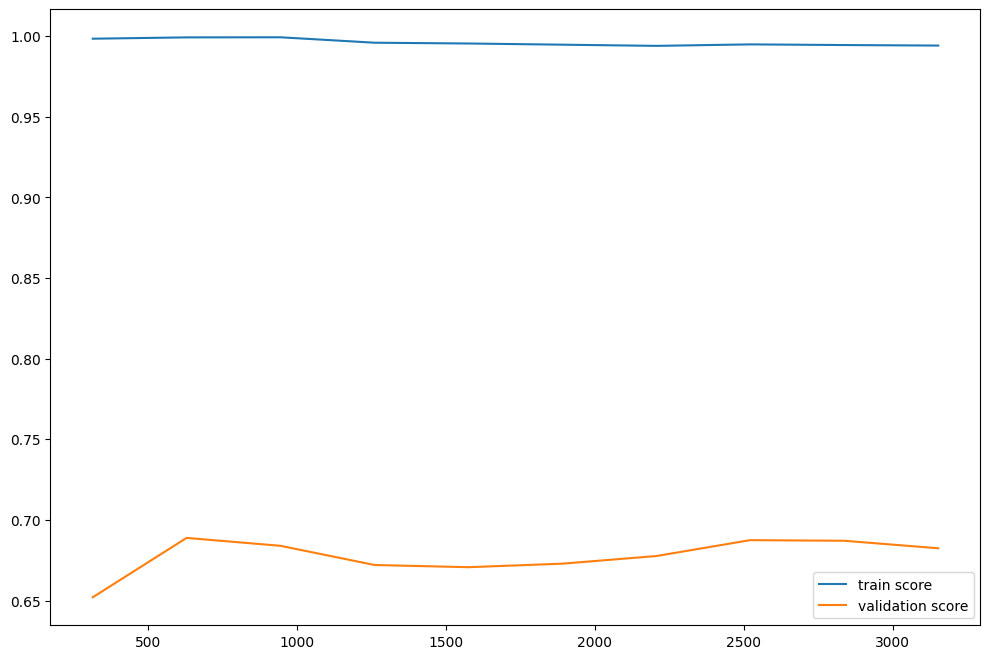

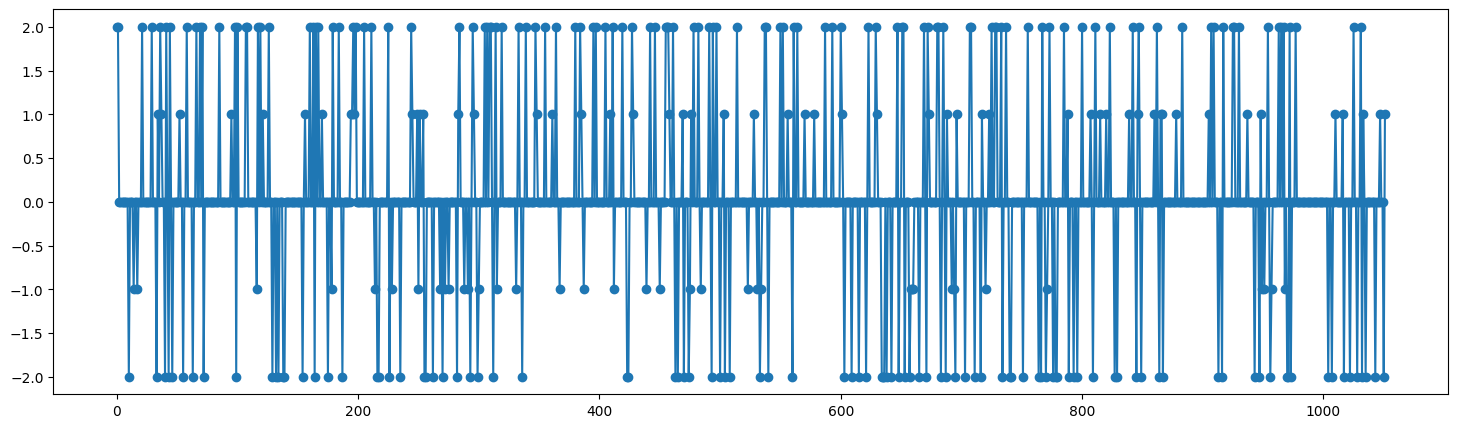

In [65]:
evaluation(model_3)

[[109   2 150]
 [  3 143  49]
 [ 64  18 514]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.50       261
           1       0.88      0.73      0.80       195
           2       0.72      0.86      0.79       596

    accuracy                           0.73      1052
   macro avg       0.74      0.67      0.69      1052
weighted avg       0.72      0.73      0.72      1052

F1 score: 0.6943569438495333


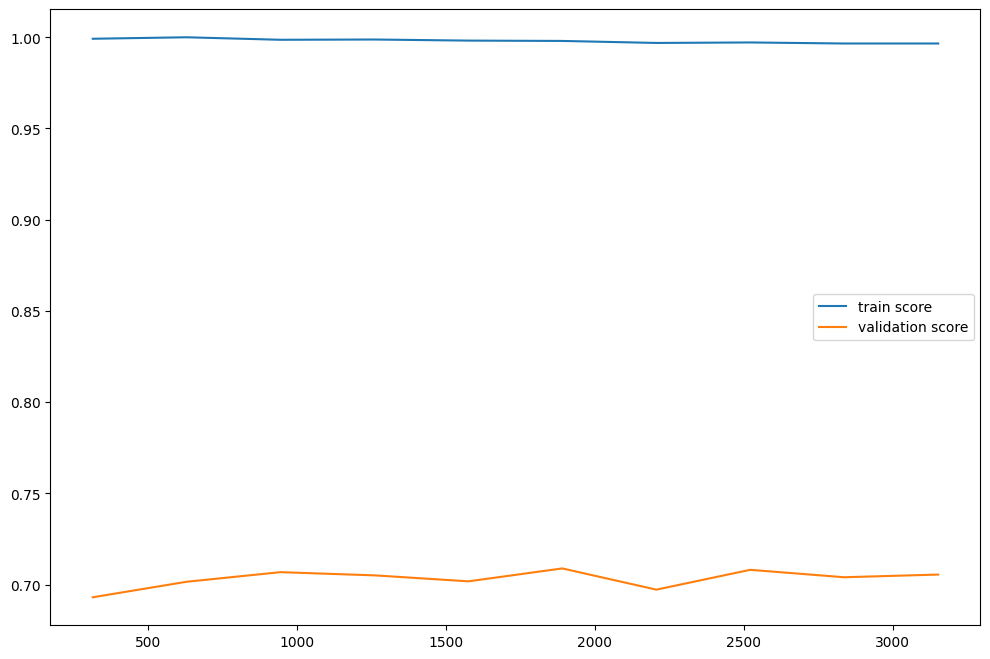

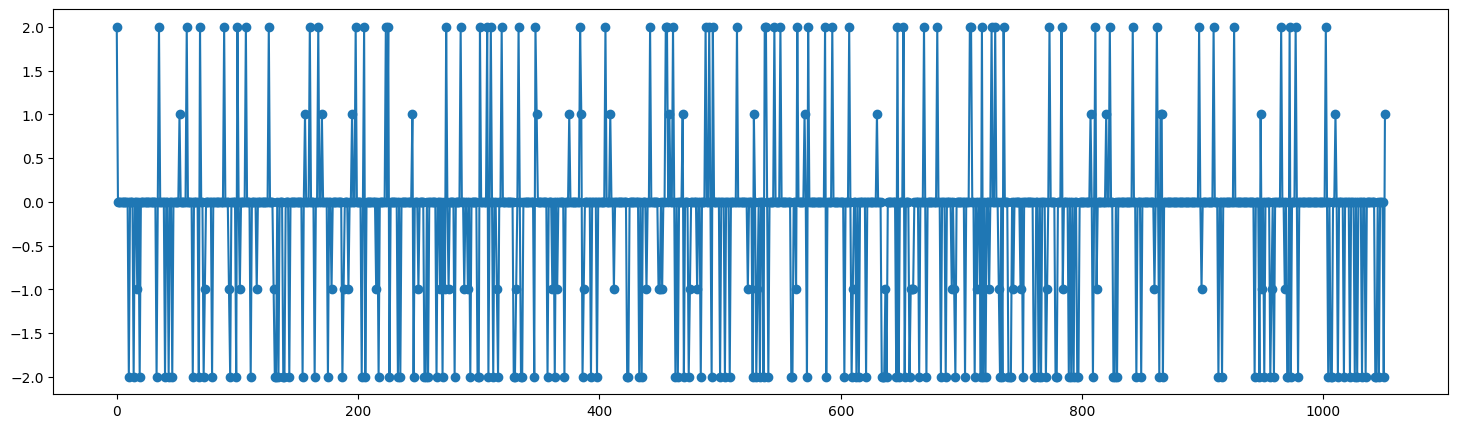

In [66]:
evaluation(model_33)

c:\Users\Corentin Galan\Desktop\Data Science Projects\FM\.venv\fm\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Corentin Galan\Desktop\Data Science Projects\FM\.venv\fm\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[161   4  96]
 [  3 160  32]
 [143  59 394]]
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       261
           1       0.72      0.82      0.77       195
           2       0.75      0.66      0.70       596

    accuracy                           0.68      1052
   macro avg       0.67      0.70      0.68      1052
weighted avg       0.69      0.68      0.68      1052

F1 score: 0.6790939004508058


c:\Users\Corentin Galan\Desktop\Data Science Projects\FM\.venv\fm\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Corentin Galan\Desktop\Data Science Projects\FM\.venv\fm\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Corentin Galan\Desktop\Data Science Projects\FM\.venv\fm\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Corentin Galan\Desktop\Data Science Projects\FM\.venv\fm\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Corentin Galan\Desktop\Data Science Projects\FM\.ve

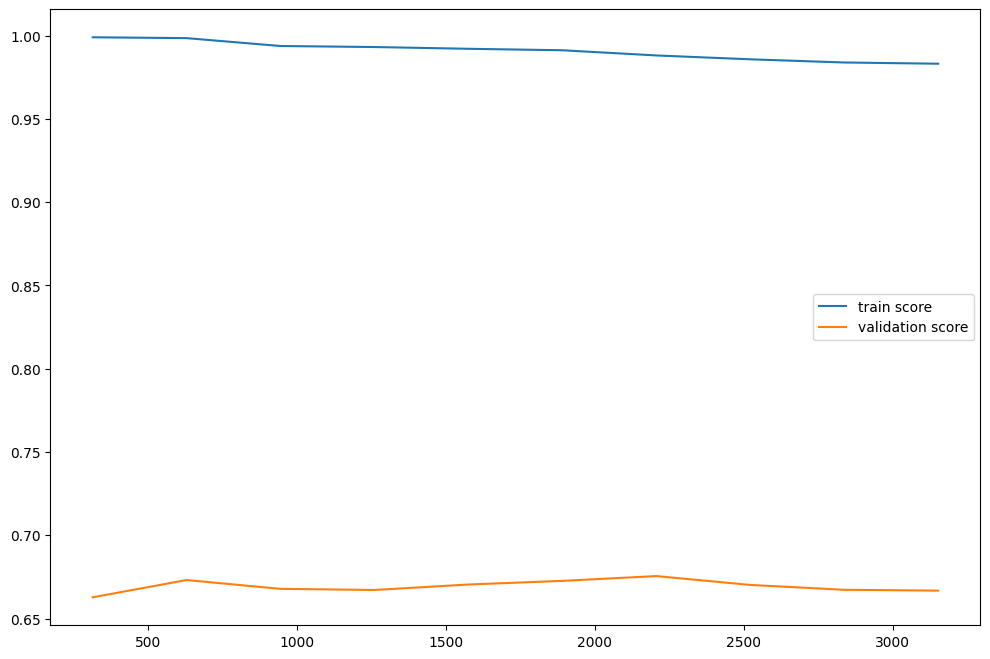

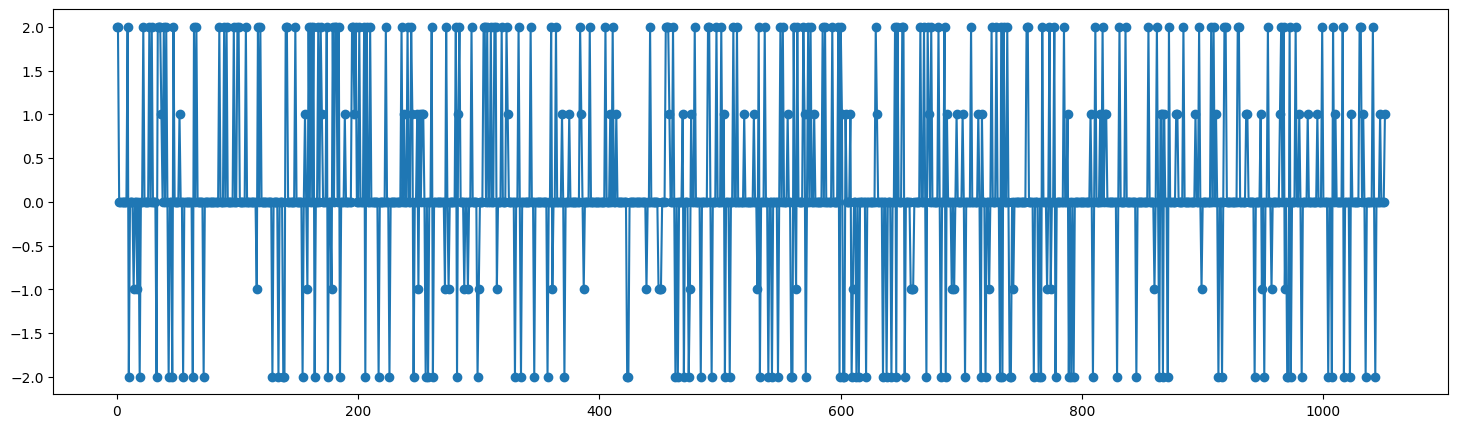

In [67]:
evaluation(model_4)

[[ 95   2 164]
 [  3 132  60]
 [ 23   5 568]]
              precision    recall  f1-score   support

           0       0.79      0.36      0.50       261
           1       0.95      0.68      0.79       195
           2       0.72      0.95      0.82       596

    accuracy                           0.76      1052
   macro avg       0.82      0.66      0.70      1052
weighted avg       0.78      0.76      0.73      1052

F1 score: 0.7020817215547028


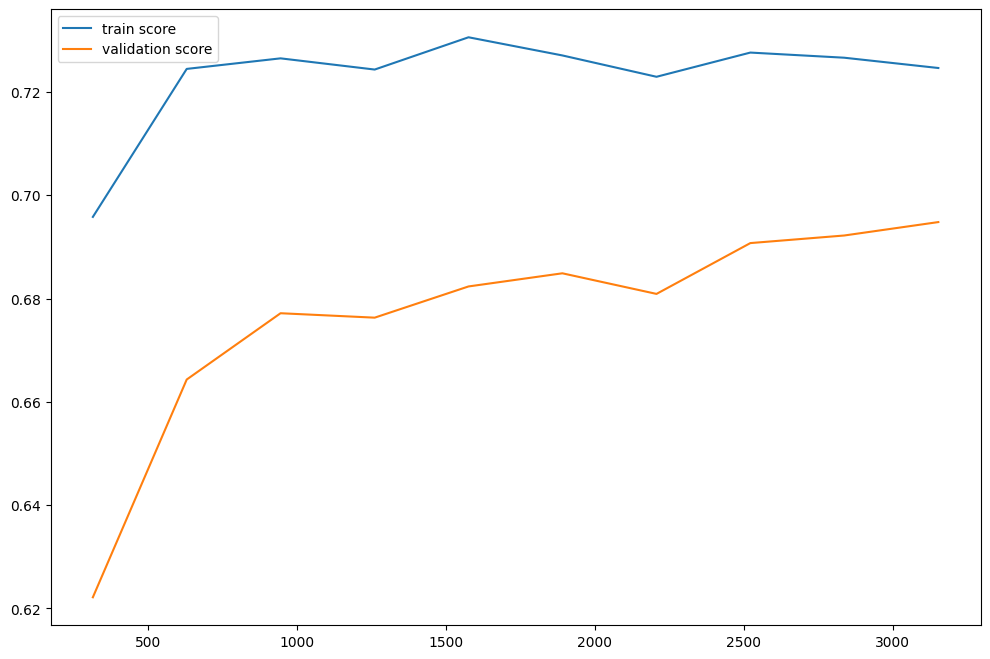

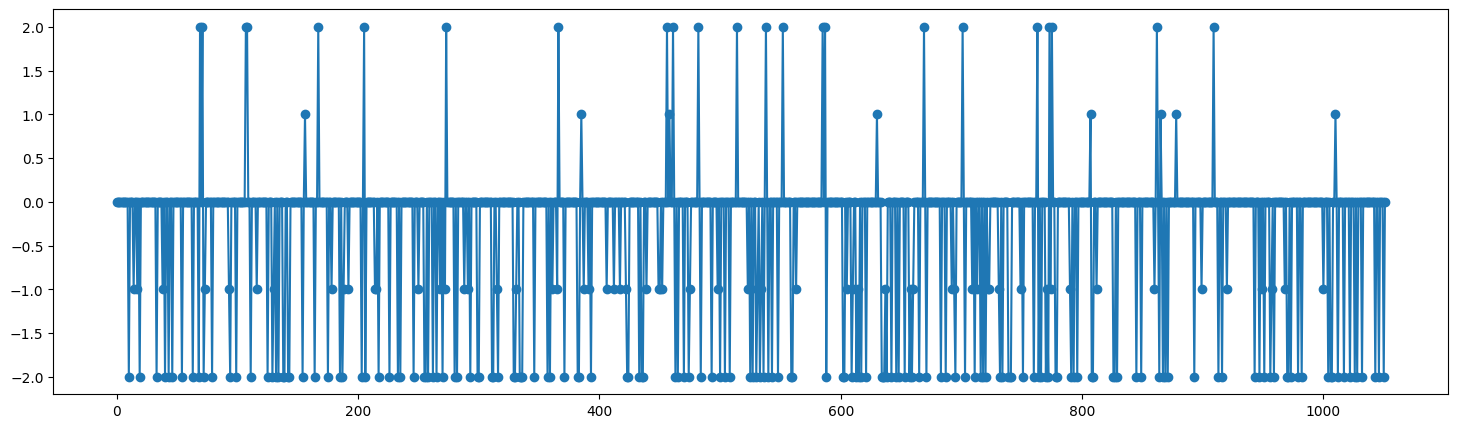

In [68]:
evaluation(model_5)

[[125   2 134]
 [  3 145  47]
 [ 63  18 515]]
              precision    recall  f1-score   support

           0       0.65      0.48      0.55       261
           1       0.88      0.74      0.81       195
           2       0.74      0.86      0.80       596

    accuracy                           0.75      1052
   macro avg       0.76      0.70      0.72      1052
weighted avg       0.74      0.75      0.74      1052

F1 score: 0.7186221743264402


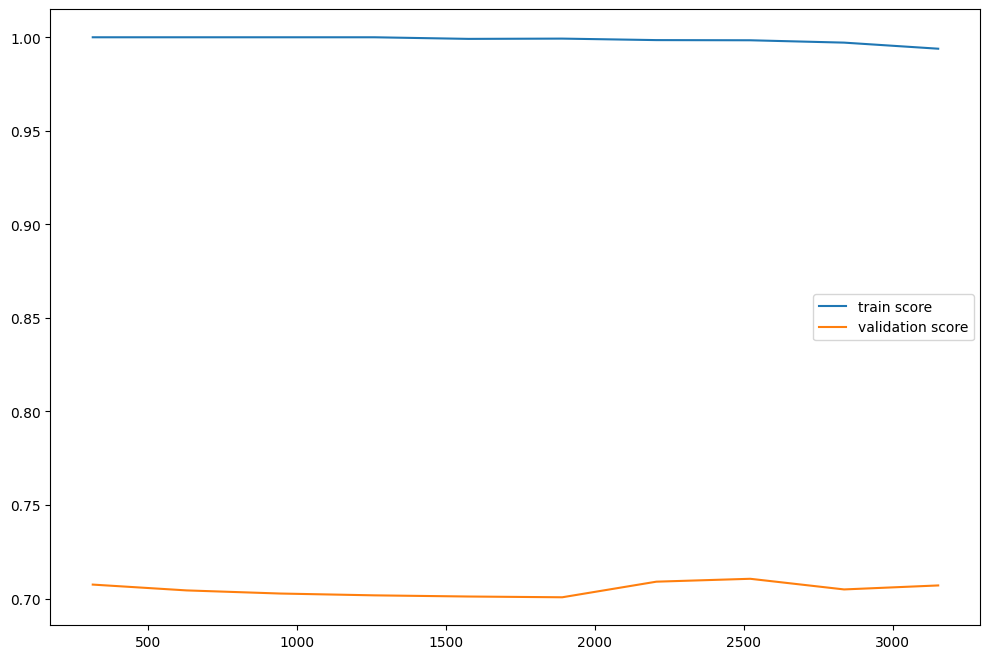

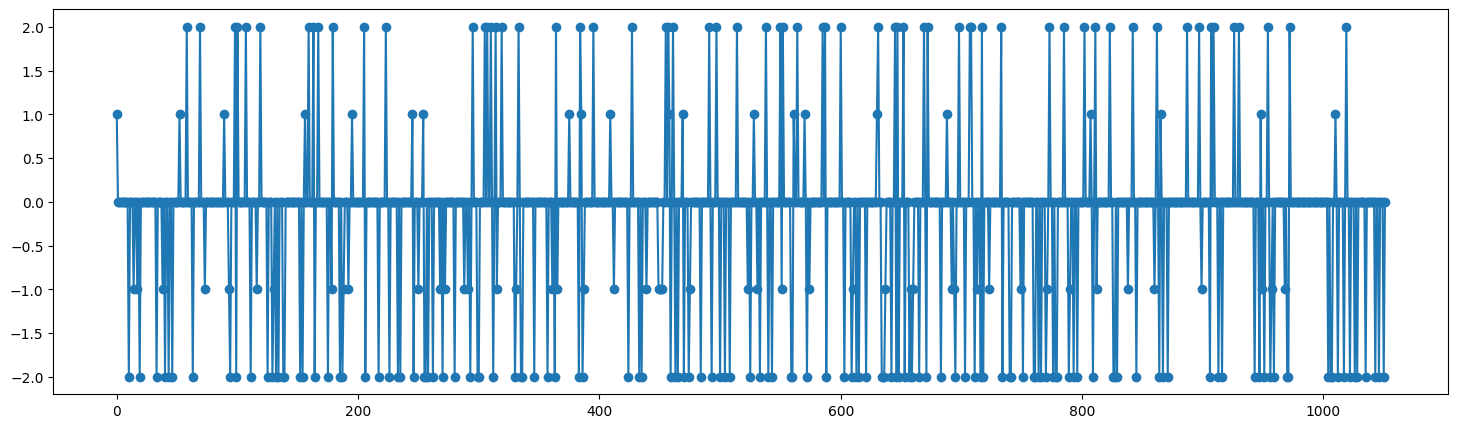

In [69]:
evaluation(model_6)

[[148   3 110]
 [  3 146  46]
 [107  33 456]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       261
           1       0.80      0.75      0.77       195
           2       0.75      0.77      0.75       596

    accuracy                           0.71      1052
   macro avg       0.71      0.69      0.70      1052
weighted avg       0.71      0.71      0.71      1052

F1 score: 0.6999434164740995


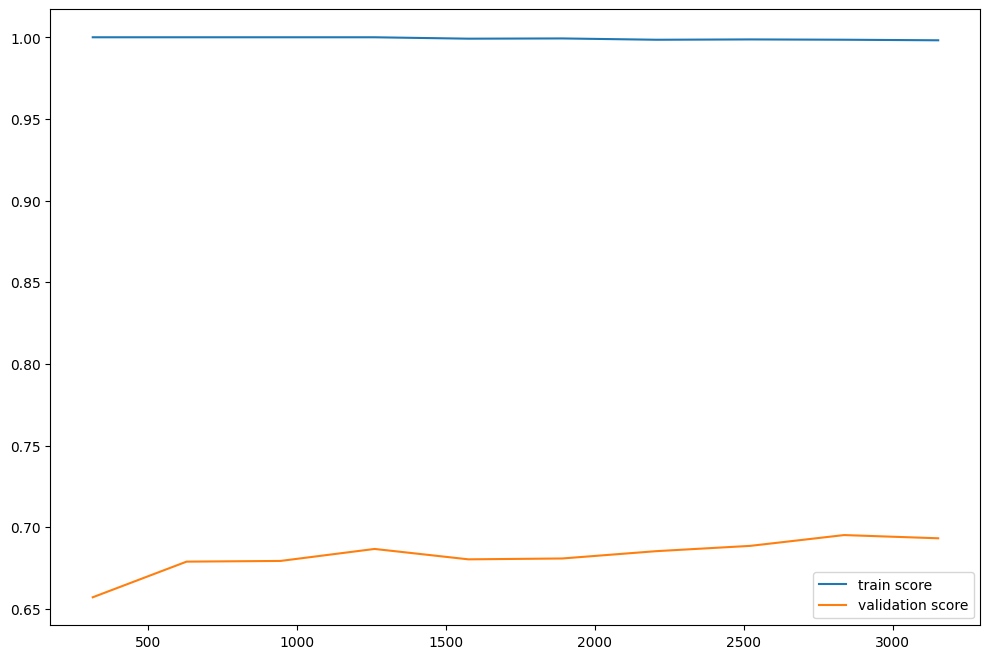

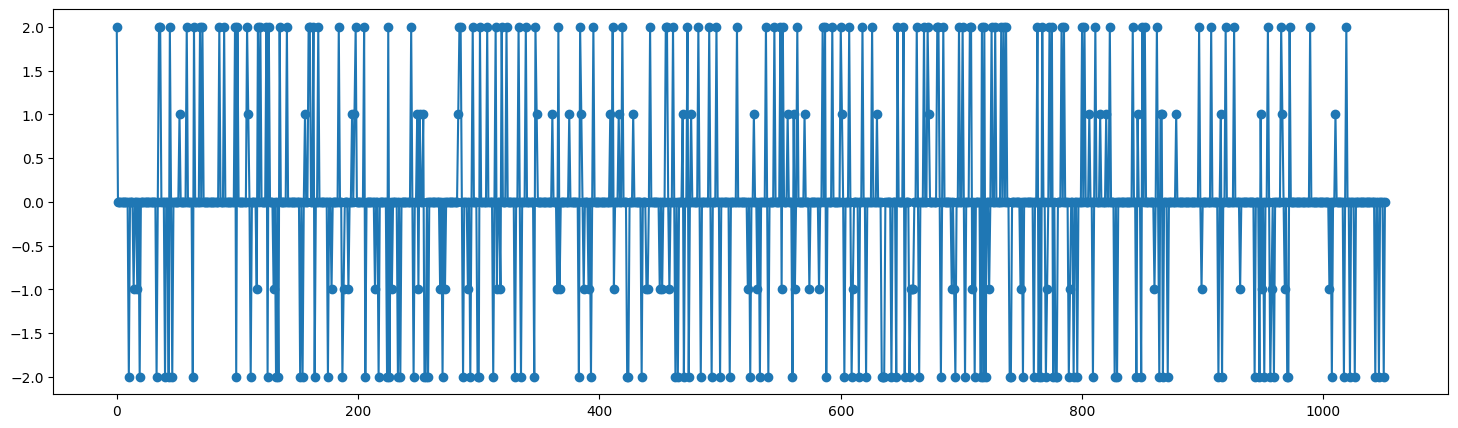

In [70]:
evaluation(model_22)

[[107   2 152]
 [ 13  97  85]
 [101  24 471]]
              precision    recall  f1-score   support

           0       0.48      0.41      0.44       261
           1       0.79      0.50      0.61       195
           2       0.67      0.79      0.72       596

    accuracy                           0.64      1052
   macro avg       0.65      0.57      0.59      1052
weighted avg       0.64      0.64      0.63      1052

F1 score: 0.5921463112027325


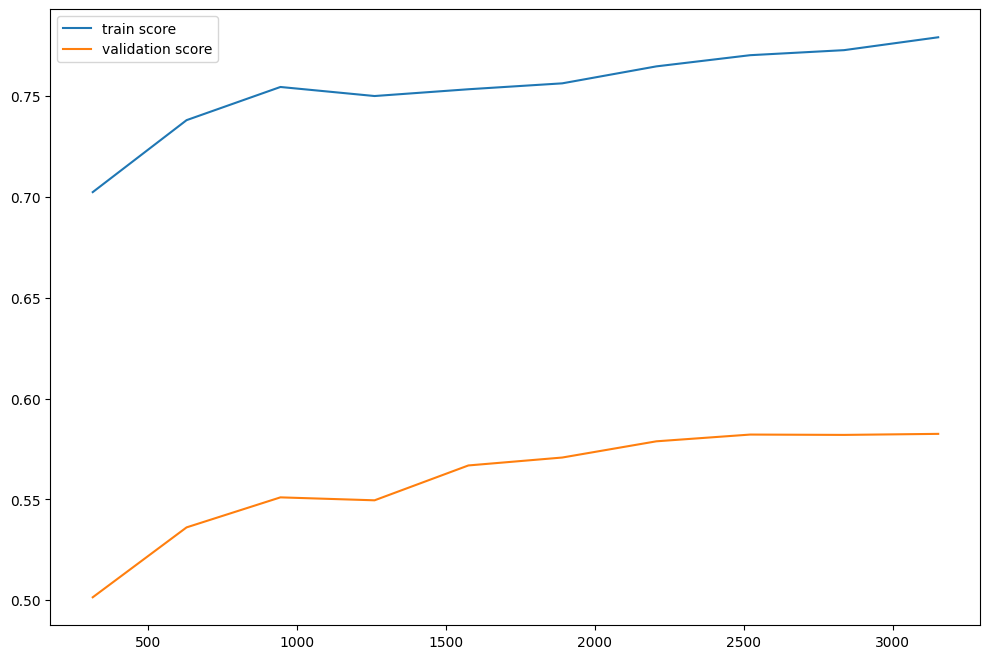

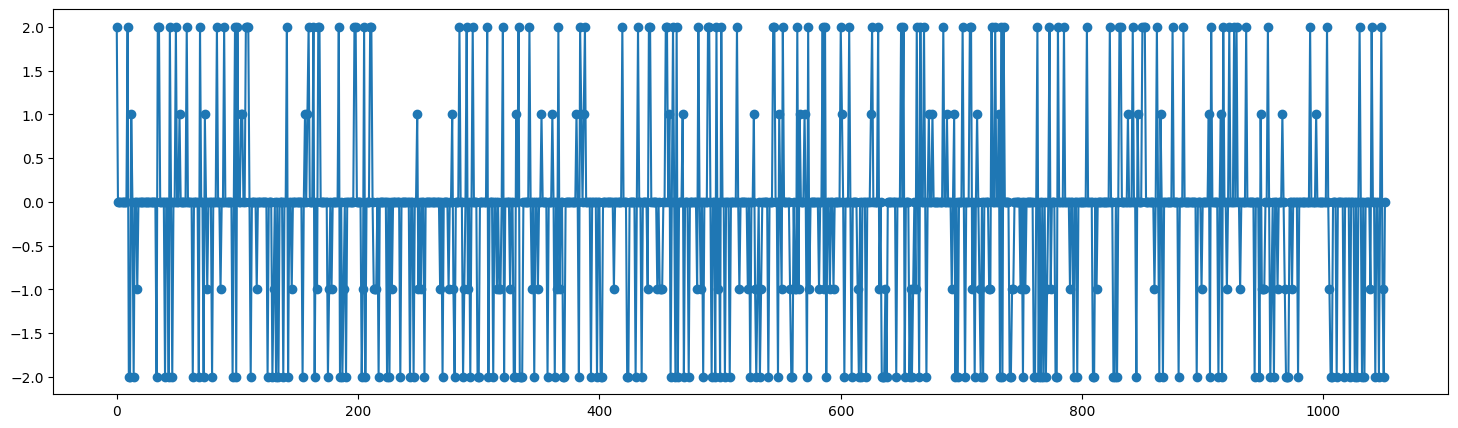

In [71]:
evaluation(model_8)

[[ 96   1 164]
 [  5 134  56]
 [ 46  27 523]]
              precision    recall  f1-score   support

           0       0.65      0.37      0.47       261
           1       0.83      0.69      0.75       195
           2       0.70      0.88      0.78       596

    accuracy                           0.72      1052
   macro avg       0.73      0.64      0.67      1052
weighted avg       0.71      0.72      0.70      1052

F1 score: 0.6674895001565476


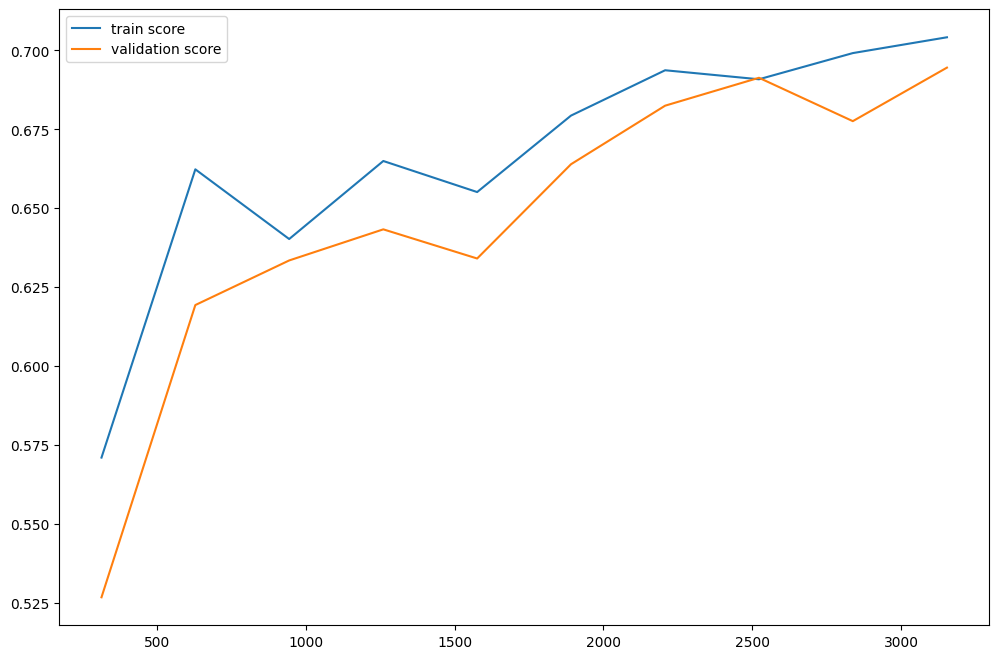

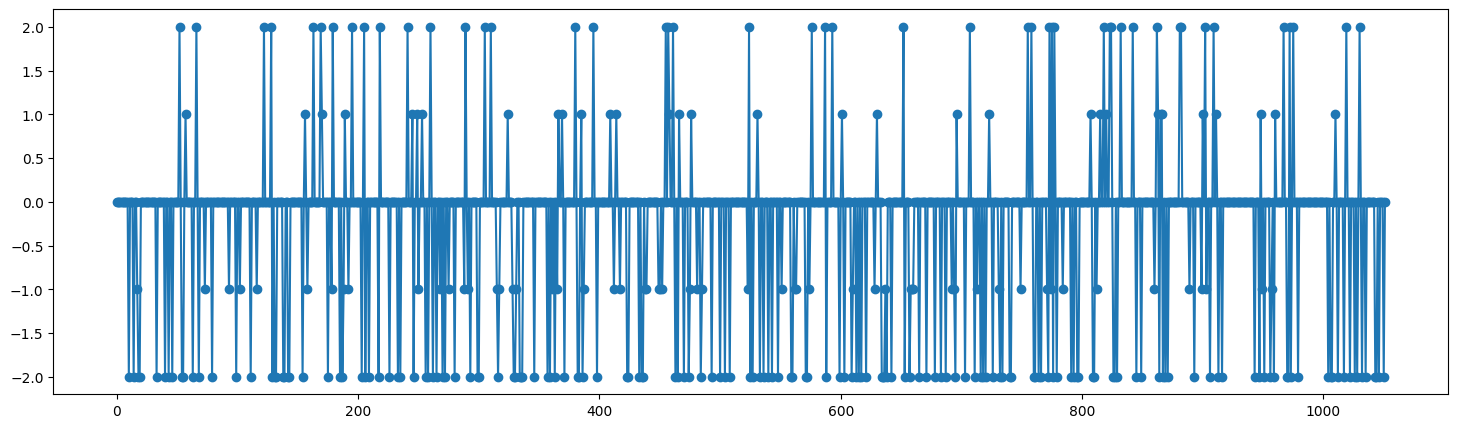

In [72]:
evaluation(model_9)

### I will select 3 because it seems to have a slightly better result for the class Progress if you look at f1 score and recall.